#                               EDA on Facebook Dataset
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTW13qN9I0liarHJAXIYLuqw7jYj-Y9KeDVYg&usqp=CAU" align='center'><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Facebook Data from CSV](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
    - 4.1.1 [Handling Missing Values](#section40101)<br>
       - 4.1.1.1 [Replacing Missing Values in Gender](#section4010101)<br>
       - 4.1.1.2 [Replacing Missing Values in Tenure](#section4010102)<br>
    - 4.1.2 [Finding Outliers in Age](#section40102)<br>
    - 4.1.3 [Handling Outliers in age](#section40103)<br>
  - 4.2 [Data Postprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Creating label for Age Group](#section501)<br>
  - 5.2 [Univariate Analysis](#section502)<br>
     - 5.2.1 [Analysis based on Users Gender Ratio](#section50301)<br>
	 - 5.2.2 [Analysis of Users Age Group Ratio](#section50302)<br>     
  - 5.3 [Bivariate Analysis](#section503)<br>
     - 5.3.1 [Analysis of Age Group Vs Gender](#section50301)<br>
     - 5.3.2 [Analysis of Friends Count Vs Friend Requests Initiated](#section50302)<br>
     - 5.3.3 [Analysis of Friends Count Vs Friends Request initiated based on Age Group](#section50303)<br>
     - 5.3.4 [Analysis of Likes Vs LikesReceived](#section50304)<br>
     - 5.3.5 [Analysis of Likes Given/Received from Browser/Mobile App based on Age Group](#section50305)<br>
     - 5.3.6 [Analysis of Friends Count Vs Friend Requests initiated based on Gender](#section50306)<br>
     - 5.3.7 [Analysis of Likes Given via Browser/Mobile App](#section50307)<br>
     - 5.3.8 [Analysis of Likes Received via Browser/Mobile App](#section50308)<br>
     - 5.3.9 [Analysis of Mobile App usage](#section50309)<br>
     - 5.3.10 [Analysis of Browser usage](#section50310)<br>
     - 5.3.11 [Analysis of Tenure Vs Gender & AgeGroup](#section50311)<br>
  - 5.4 [MultiVariate Analysis](#section504)<br>
     - 5.4.1 [Frequency analysis of FriendsCount Vs Friendships Initiated](#section50401)<br>
     - 5.4.2 [Analysis on count of Likes Received/Given from Browser/Mobile App](#section50402)<br>
     - 5.4.3 [Analysis of Likes Given/Received from Browser/Mobile App against Age & Gender](#section50403)<br>
     - 5.4.4 [Analysis of Likes Vs Likes Received based on Gender](#section50404)<br>
     - 5.4.5 [Analysis of Likes Vs Likes Received based on Age Group](#section50405)<br>
     - 5.4.6 [Friends Count & Friendships Initiated based on Age Group](#section50406)<br>
     - 5.4.7 [Friends Count & Friendships Initiated based on Gender](#section50407)<br>
     - 5.4.8 [Likes Given/Received across platforms based on Gender](#section50408)<br>
     - 5.4.9 [Likes Given/Received across platforms based on Age Group](#section50409)<br>
  - 5.5 [Correlation between numerical variables](#section505)<br>
6. [Conclusion](#section6)<br><br>

<a id=section1></a>
##   Problem Statement

Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status,thoughts and pictures with their friends. With the mobile app , it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes . We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group,gender etc.

<a id=section2></a>
## Import Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth',40)           # To display all the data in each column
pd.options.display.max_columns= 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [6]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [5]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install --user plotly --upgrade

  Attempting uninstall: plotly
    Found existing installation: plotly 4.10.0
    Uninstalling plotly-4.10.0:
      Successfully uninstalled plotly-4.10.0


In [3]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## Loading Facebook Data from CSV

In [4]:
fb_df=pd.read_csv("facebook_data.csv")
fb_df.head(3)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0


<a id=section301></a>
## Desciption of the Dataset

This dataset provides a usage analysis of various facebook users such as the tenure of their account,number of friends they have,number of friendships they have initiated , the number of likes received by them through the FB website and through the mobile app.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| userid	                     | A numeric value uniquely identifying the user
| age	                         | Age of the user in years
| dob_day	                     | Day part of the user's date of birth
| dob_year	                     | Year part of the user's date of birth
| dob_month	                     | Month part of the user's date of birth
| gender	                     | Gender of the user
| tenure	                     | Number of days since the user has been on FB
| friend_count	                 | Number of friends the user has
| friendships_initiated	         | Number of friendships initiated by the user
| likes	                         | Total number of posts liked by the user
| likes_received	             | Total Number of likes received by user's posts
| mobile_likes	                 | Number of posts liked by the user through mobile app
| mobile_likes_received          | Number of likes received by user through mobile app
| www_likes	                     | Number of posts liked by the user through web
| www_likes_received	         | Number of likes received by user through web

<a id=section302></a>
## Pandas Profiling before Data Preprocessing

In [4]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\programdata\anaconda3\lib\site-packages (2.9.0)


In [5]:
import pandas_profiling

Here, we will perform Pandas Profiling before preprocessing our dataset, so we will name the output file as **Facebook_profiling_preprocessing_report.html**.

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as Facebook_profiling_preprocessing_report.html

profile = fb_df.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="Facebook_profiling_preprocessing_report.html")

### Observations from Pre-Profiling

#### Dataset Info:
* Number of variables: 15
* Number of observations: 99003
* Missing cells: 177 (<0.1%)

#### Variables Types:
* Numeric: 14
* Categorical: 1
* Rejected: 0

#### . dob_year is highly correlated with age	
#### . age is highly correlated with dob_year
#### . mobile_likes_received is highly correlated with likes_received
#### . likes_received is highly correlated with mobile_likes_received and 1 other fields
#### . www_likes_received is highly correlated with likes_received
#### . likes_received is highly skewed (γ1 = 112.0745682)
#### . mobile_likes_received is highly skewed (γ1 = 107.5312999)
#### . www_likes_received is highly skewed (γ1 = 126.257317)
#### . userid has unique values
#### . friend_count has 1962 (2.0%) zeros
#### . friendships_initiated has 2997 (3.0%) zeros
#### . likes has 22308 (22.5%) zeros
#### . likes_received has 24428 (24.7%) zeros
#### . mobile_likes has 35056 (35.4%) zeros
#### . mobile_likes_received has 30003 (30.3%) zeros
#### . www_likes has 60999 (61.6%) zeros
#### . www_likes_received has 36864 (37.2%) zeros
#### . There are outliers in Age
#### . There are missing values in Gender & Tenure

<a id=section4></a>
## Data Preprocessing

<a id=section401></a>
### Data Preprocessing

Here we will perform Data Preprocessing on our dataset, to make the data usable for EDA.

In [5]:
#dropping irrelevant columns for Data Analysis
upd_fb_df=fb_df.drop(['userid','dob_day','dob_year','dob_month'],axis=1)

In [34]:
upd_fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    99003 non-null  int64   
 1   gender                 99003 non-null  object  
 2   tenure                 99003 non-null  float64 
 3   friend_count           99003 non-null  int64   
 4   friendships_initiated  99003 non-null  int64   
 5   likes                  99003 non-null  int64   
 6   likes_received         99003 non-null  int64   
 7   mobile_likes           99003 non-null  int64   
 8   mobile_likes_received  99003 non-null  int64   
 9   www_likes              99003 non-null  int64   
 10  www_likes_received     99003 non-null  int64   
 11  age_group              99003 non-null  category
dtypes: category(1), float64(1), int64(9), object(1)
memory usage: 8.4+ MB


<a id=section40101></a>
### Handling Missing Values

<a id=section4010101></a>
#### Replacing Missing Values in Gender

In [6]:
mode_age=upd_fb_df['gender'].mode().values[0]
upd_fb_df['gender']=upd_fb_df['gender'].replace(np.nan,mode_age)

<a id=section4010102></a>
#### Replacing Missing Values in Tenure

In [7]:
mode_tenure=upd_fb_df['tenure'].mode().values[0]
upd_fb_df['tenure']=upd_fb_df['tenure'].replace(np.nan,mode_tenure)

<a id=section40102></a>
### Finding Outliers in Age

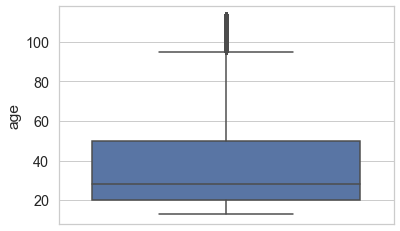

In [8]:
sns.boxplot(y="age",data=upd_fb_df)

<a id=section40103></a>
### Handling Outliers in age

In [13]:
#function to remove outliers if any
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [14]:
lowage,highage=remove_outlier(upd_fb_df['age'])
upd_fb_df['age']=np.where(upd_fb_df['age']>highage,highage,upd_fb_df['age'])
upd_fb_df['age']=np.where(upd_fb_df['age']<lowage,lowage,upd_fb_df['age'])
upd_fb_df['age']=upd_fb_df['age'].astype('int64')

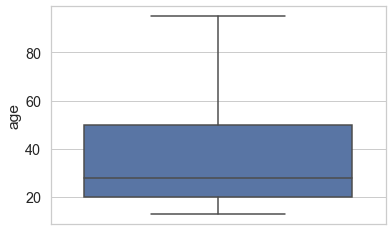

In [15]:
sns.boxplot(y="age",data=upd_fb_df)

<a id=section402></a>
## Data Postprocessing

Here, we will perform Pandas Profiling after preprocessing our dataset, so we will name the output file as **Facebook_profiling_after_processing_report.html**.

In [239]:
# To output pandas profiling report to an external html file.
# Saving the output as Facebook_profiling_after_processing_report.html

profile = upd_fb_df.profile_report(title='Pandas Profiling after Data Processing')
profile.to_file(output_file="Facebook_profiling_after_processing_report.html")

### Observations from Profiling Post Processing

#### Dataset Info:
* Number of variables: 11
* Number of observations: 99003
* Missing cells: 0 (0.0%)

#### Variables Types:
* Numeric: 10
* Categorical: 1
* Rejected: 0

#### Dataset has (0.1%) duplicate rows i.e., 91
#### likes_received is highly correlated with mobile_likes_received and www_likes_received
#### likes_received is highly skewed (γ1 = 112.0745682)
#### mobile_likes_received is highly skewed (γ1 = 107.5312999) 
#### www_likes_received is highly skewed (γ1 = 126.257317) 
#### friend_count has 1962 (2.0%) zeros
#### friendships_initiated has 2997 (3.0%) zeros
#### likes has 22308 (22.5%) zeros
#### likes_received has 24428 (24.7%) zeros
#### mobile_likes has 35056 (35.4%) zeros
#### mobile_likes_received has 30003 (30.3%) zeros
#### www_likes has 60999 (61.6%) zeros
#### www_likes_received has 36864 (37.2%) zeros

<a id=section5></a>
## Exploratory Data Analysis

## Analysis Based on Metrics

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

<a id=section501></a>
### Creating label for Age Group

In [17]:
upd_fb_df['age_group']=pd.cut(upd_fb_df['age'].dropna(),[10,20,30,40,50,60,70,80,90,100], labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'], include_lowest=True)

<a id=section502></a>
### Univariate Analysis

<a id=section50201></a>
### Analysis based on Users Gender Ratio

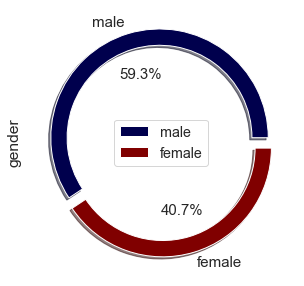

In [100]:
upd_fb_df['gender'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=15, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, legend=True, 
                                               wedgeprops=dict(width=0.15), cmap='seismic')
plt.legend(loc='center')
plt.show()

<a id=section50202></a>
### Analysis of Users Age Group Ratio

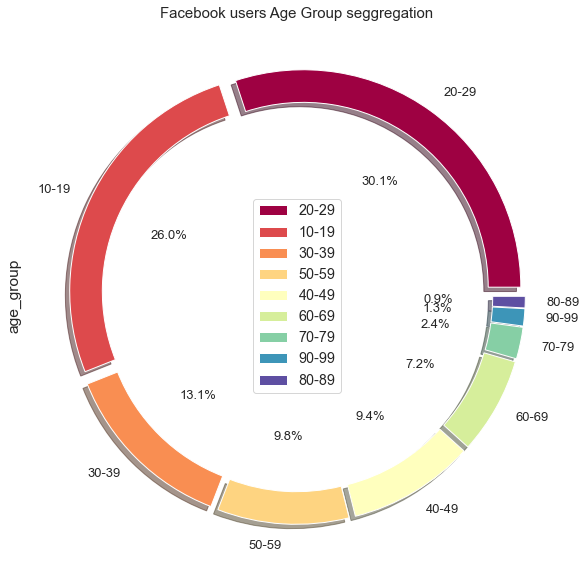

In [200]:
upd_fb_df['age_group'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],                                             
                                           fontsize=13, autopct='%3.1f%%', figsize=(10,10), shadow=True,  
                                           legend=True, cmap='Spectral',wedgeprops=dict(width=0.15))
plt.legend(loc='center')
plt.title('Facebook users Age Group seggregation',fontsize=15)
plt.show()

<a id=section503></a>
### Bivariate Analysis

<a id=section50301></a>
### Analysis of Age Group Vs Gender

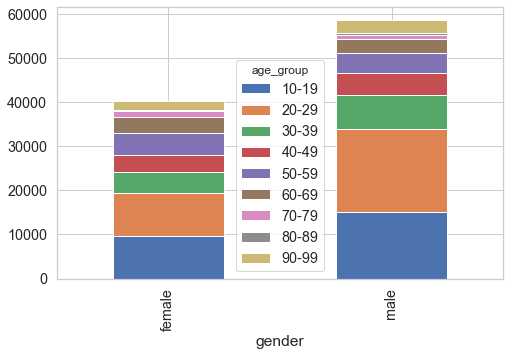

In [36]:
age_gender = upd_fb_df.groupby(['age_group', 'gender'])['gender'].count().unstack('age_group').fillna(0)
age_gender.plot(kind="bar",stacked=True)
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

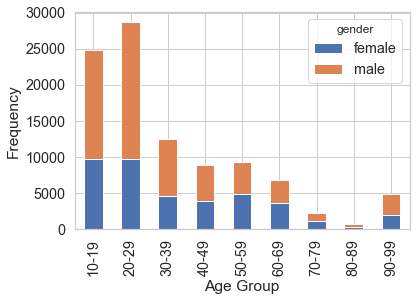

In [35]:
age_gender = upd_fb_df.groupby(['age_group', 'gender'])['age_group'].count().unstack('gender').fillna(0)
age_gender.plot(kind="bar",stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

<a id=section50302></a>
### Analysis of Friends Count Vs Friend Requests Initiated

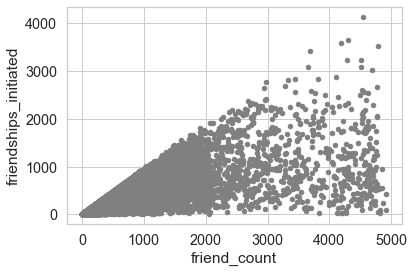

In [23]:
upd_fb_df.plot(kind='scatter',x='friend_count',y='friendships_initiated',color='Grey')
plt.show()

<a id=section50303></a>
### Analysis of Friends Count Vs Friends Request initiated based on Age Group

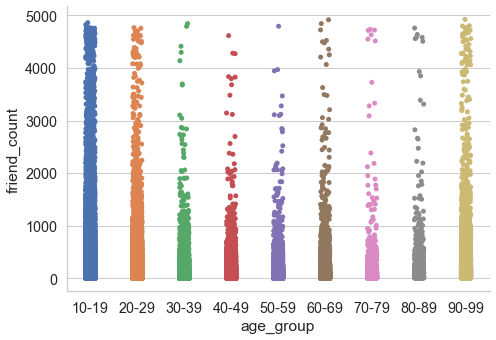

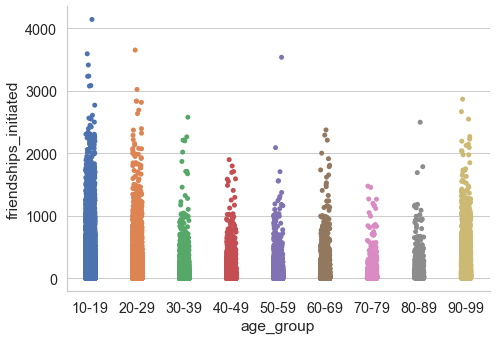

In [137]:
sns.catplot(x="age_group", y="friend_count", data=upd_fb_df)
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.catplot(x="age_group", y="friendships_initiated", data=upd_fb_df)
fig=plt.gcf()
fig.set_size_inches(8,5)

<a id=section50304></a>
### Analysis of Likes Vs LikesReceived

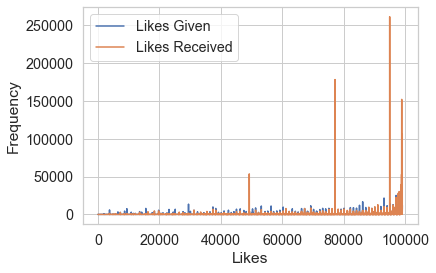

In [26]:
sns.lineplot(data=upd_fb_df['likes'], label="Likes Given")
sns.lineplot(data=upd_fb_df['likes_received'], label="Likes Received")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

<a id=section50305></a>
### Analysis of Likes Given/Received from Browser/Mobile App based on Age Group

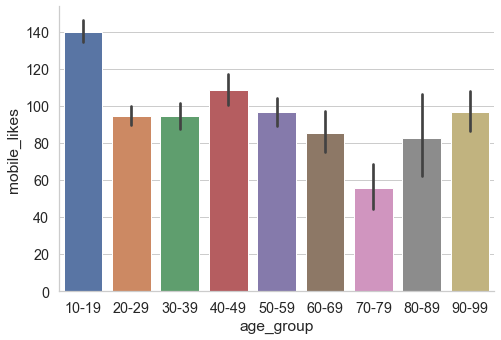

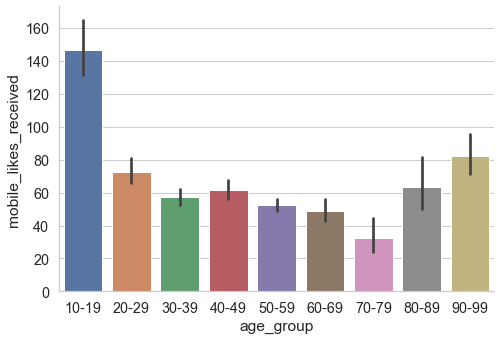

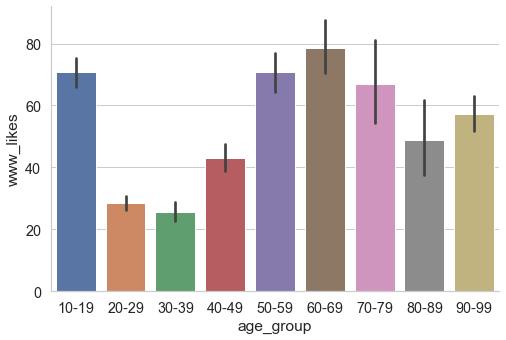

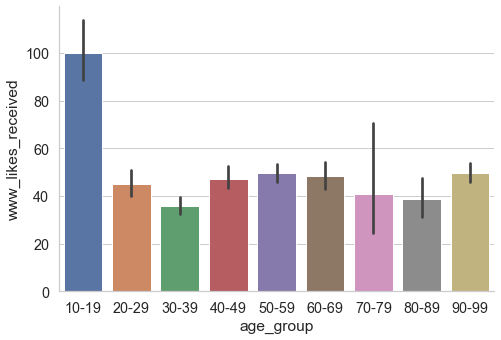

In [143]:
#Scatter Plot to show count of Mobile Likes Given based on age group
sns.catplot(x="age_group", y="mobile_likes", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
#Scatter Plot to show count of Mobile Likes Received based on age group
sns.catplot(x="age_group", y="mobile_likes_received", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
#Scatter Plot to show count of Web Likes Given based on age group
sns.catplot(x="age_group", y="www_likes", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
#Scatter Plot to show count of Web Likes Received based on age group
sns.catplot(x="age_group", y="www_likes_received", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<a id=section50306></a>
### Analysis of Friends Count Vs Friend Requests initiated based on Gender

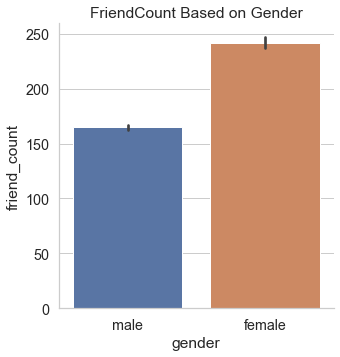

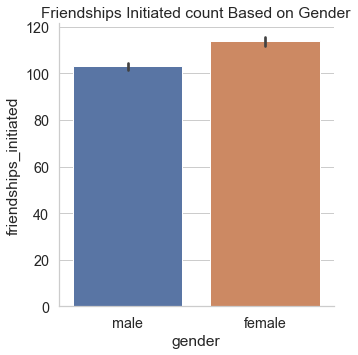

In [150]:
sns.catplot(x="gender", y="friend_count", data=upd_fb_df,kind='bar')
plt.title("FriendCount Based on Gender")
sns.catplot(x="gender", y="friendships_initiated", data=upd_fb_df,kind='bar')
plt.title("Friendships Initiated count Based on Gender")
plt.show()

<a id=section50307></a>
### Analysis of Likes Given via Browser/Mobile App

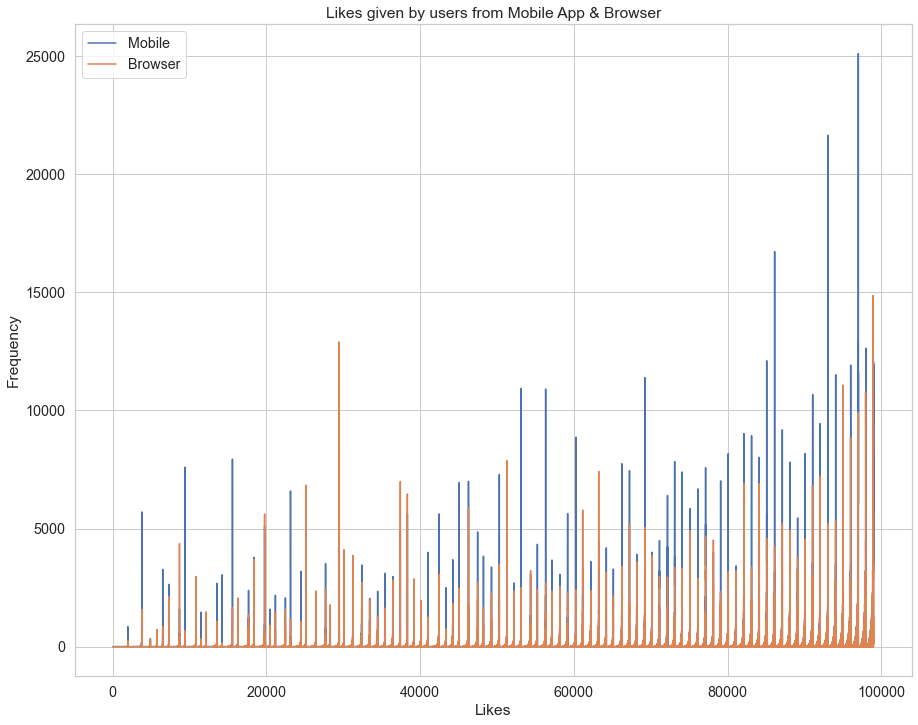

In [152]:
sns.lineplot(data=upd_fb_df['mobile_likes'], label="Mobile")
sns.lineplot(data=upd_fb_df['www_likes'], label="Browser")
plt.title("Likes given by users from Mobile App & Browser")
plt.xlabel("Likes")
plt.ylabel("Frequency")
fig=plt.gcf()
fig.set_size_inches(15,12)

<a id=section50308></a>
### Analysis of Likes Received via Browser/Mobile App

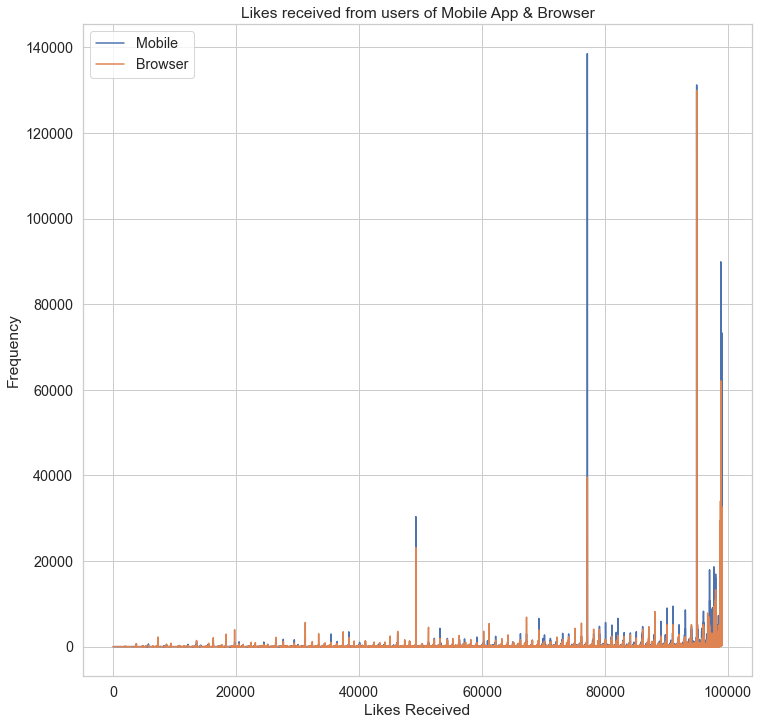

In [28]:
sns.lineplot(data=upd_fb_df['mobile_likes_received'], label="Mobile")
sns.lineplot(data=upd_fb_df['www_likes_received'], label="Browser")
plt.title("Likes received from users of Mobile App & Browser")
plt.xlabel("Likes Received")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
fig=plt.gcf()
fig.set_size_inches(12,12)

<a id=section50309></a>
### Analysis of Mobile App usage

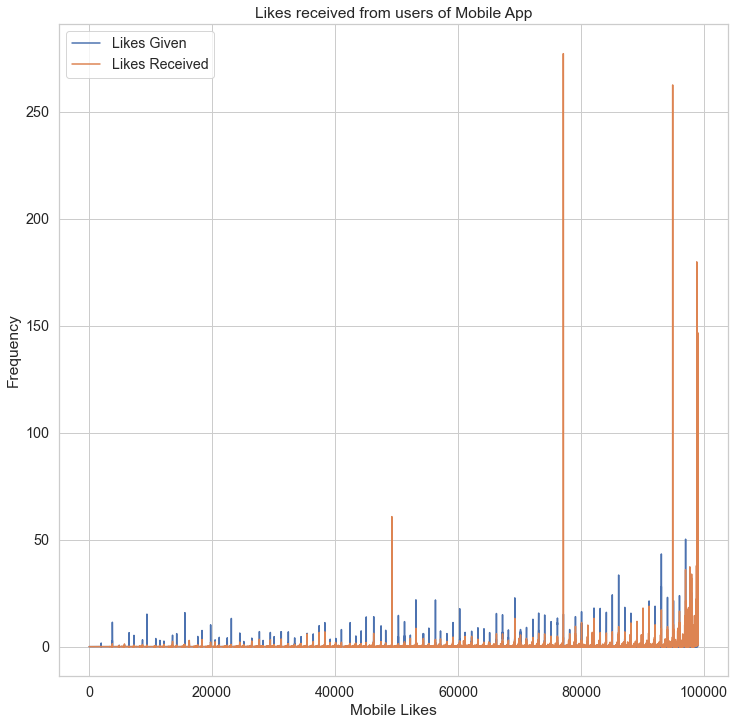

In [29]:
sns.lineplot(data=upd_fb_df['mobile_likes']/500, label="Likes Given")
sns.lineplot(data=upd_fb_df['mobile_likes_received']/500, label="Likes Received")
plt.title("Likes received from users of Mobile App")
plt.xlabel("Mobile Likes")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
fig=plt.gcf()
fig.set_size_inches(12,12)

<a id=section50310></a>
### Analysis of Browser usage

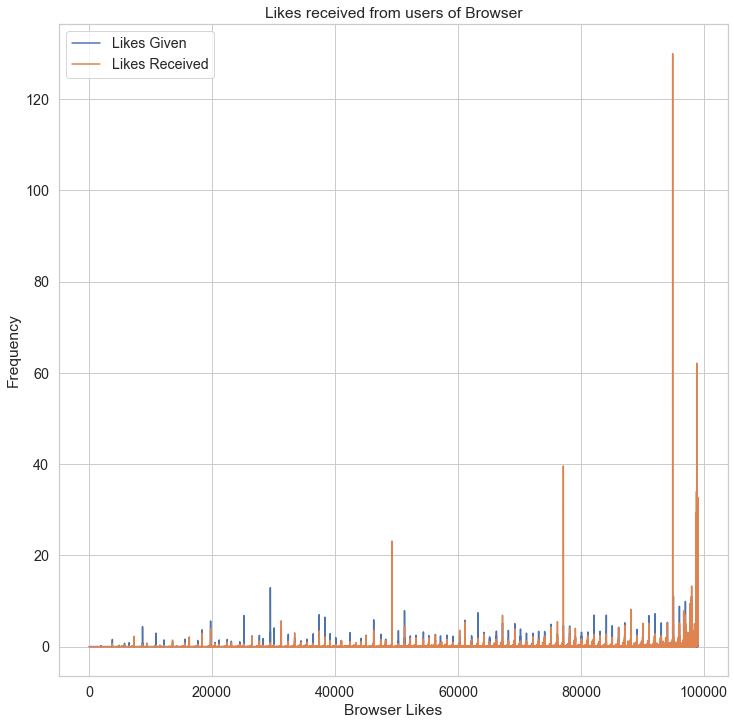

In [195]:
sns.lineplot(data=upd_fb_df['www_likes']/1000, label="Likes Given")
sns.lineplot(data=upd_fb_df['www_likes_received']/1000, label="Likes Received")
plt.title("Likes received from users of Browser")
plt.xlabel("Browser Likes")
plt.ylabel("Frequency")
fig=plt.gcf()
fig.set_size_inches(12,12)

<a id=section50311></a>
### Analysis of Tenure Vs Gender & AgeGroup

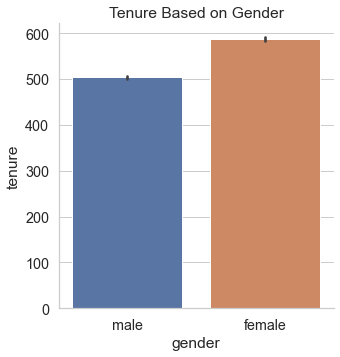

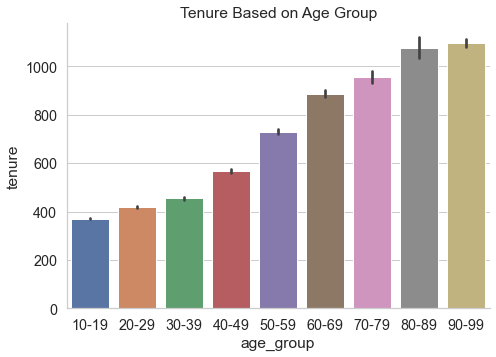

In [47]:
sns.catplot(x="gender", y="tenure", data=upd_fb_df,kind='bar')
plt.title("Tenure Based on Gender")
sns.catplot(x="age_group", y="tenure", data=upd_fb_df,kind='bar')
plt.title("Tenure Based on Age Group")
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<a id=section504></a>
### MultiVariate Analysis

<a id=section50401></a>
### Frequency analysis of FriendsCount Vs Friendships Initiated

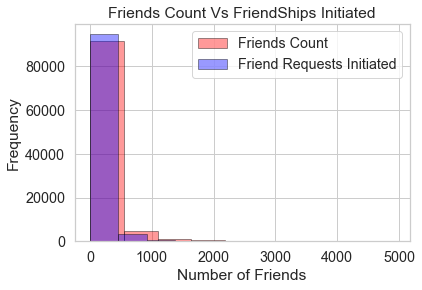

In [50]:
sns.distplot(upd_fb_df['friend_count'], hist=True, kde=False, 
             bins=int(180/20), color = 'red',
             hist_kws={'edgecolor':'black'}, label="Friends Count")
sns.distplot(upd_fb_df['friendships_initiated'], hist=True, kde=False, 
             bins=int(180/20), color = 'blue',
             hist_kws={'edgecolor':'black'}, label="Friend Requests Initiated")
plt.title('Friends Count Vs FriendShips Initiated')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<a id=section50402></a>
### Analysis on count of Likes Received/Given from Browser/Mobile App

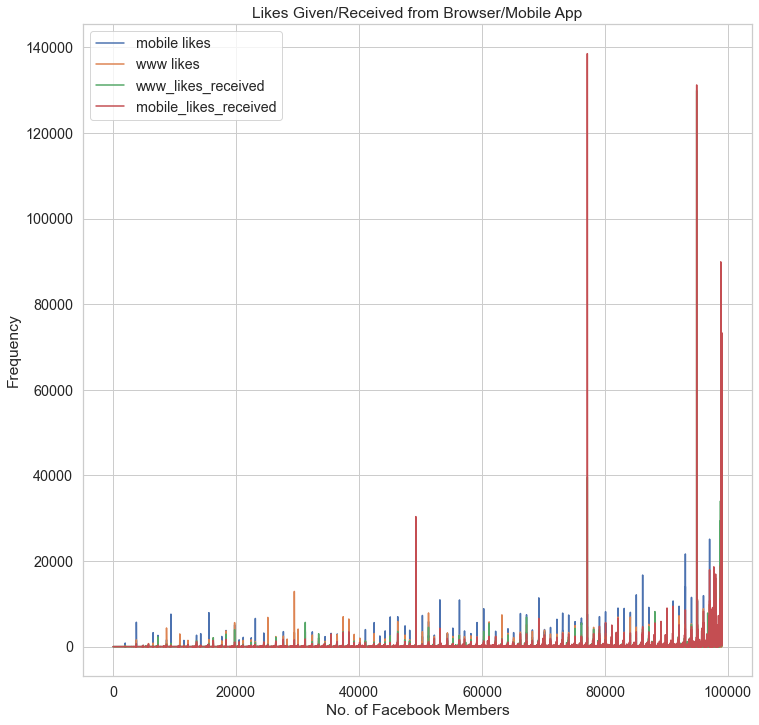

In [174]:
sns.lineplot(data=upd_fb_df['mobile_likes'], label="mobile likes")
sns.lineplot(data=upd_fb_df['www_likes'], label="www likes")
sns.lineplot(data=upd_fb_df['www_likes_received'], label="www_likes_received")
sns.lineplot(data=upd_fb_df['mobile_likes_received'], label="mobile_likes_received")
plt.title("Likes Given/Received from Browser/Mobile App")
plt.xlabel("No. of Facebook Members")
plt.ylabel("Frequency")
fig=plt.gcf()
fig.set_size_inches(12,12)

<a id=section50403></a>
### Analysis of Likes Given/Received from Browser/Mobile App against Age & Gender

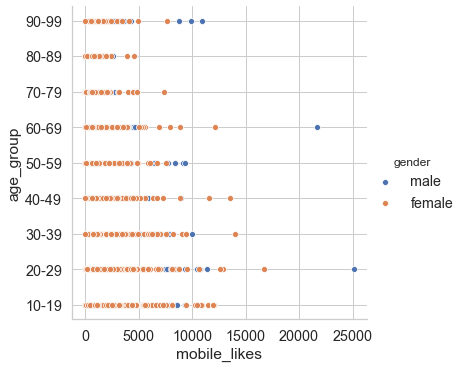

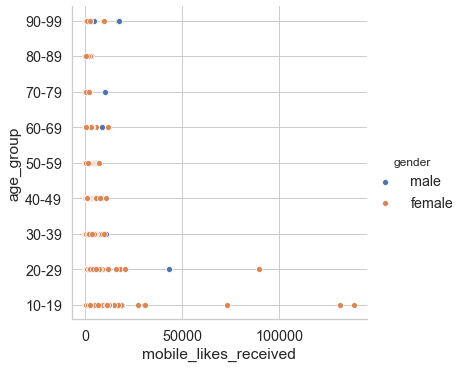

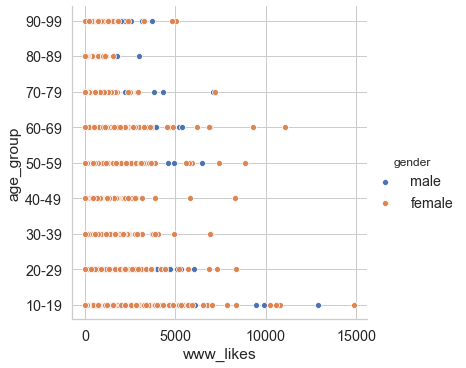

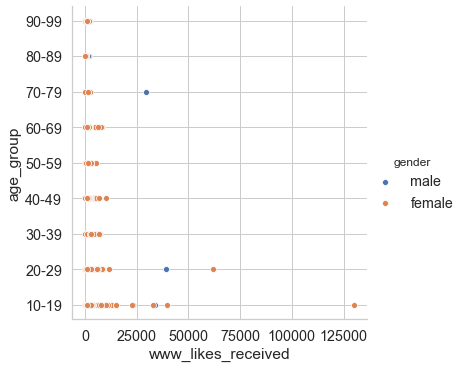

In [32]:
sns.pairplot(x_vars=['mobile_likes'], y_vars=['age_group'], data=upd_fb_df, hue="gender", size=5)
sns.pairplot(x_vars=['mobile_likes_received'], y_vars=['age_group'], data=upd_fb_df, hue="gender", size=5)
sns.pairplot(x_vars=['www_likes'], y_vars=['age_group'], data=upd_fb_df, hue="gender", size=5)
sns.pairplot(x_vars=['www_likes_received'], y_vars=['age_group'], data=upd_fb_df, hue="gender", size=5)
plt.show()

<a id=section50404></a>
### Analysis of Likes Vs Likes Received based on Gender

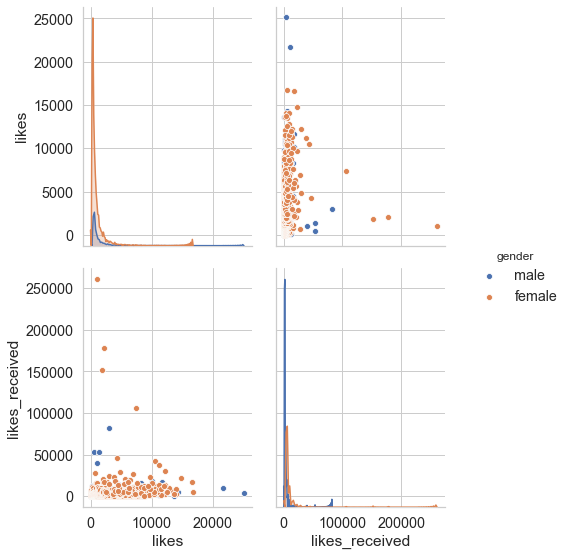

In [29]:
likes = upd_fb_df[['likes','likes_received','gender']]
sns.pairplot(likes, hue="gender")
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

<a id=section50405></a>
### Analysis of Likes Vs Likes Received based on Age Group

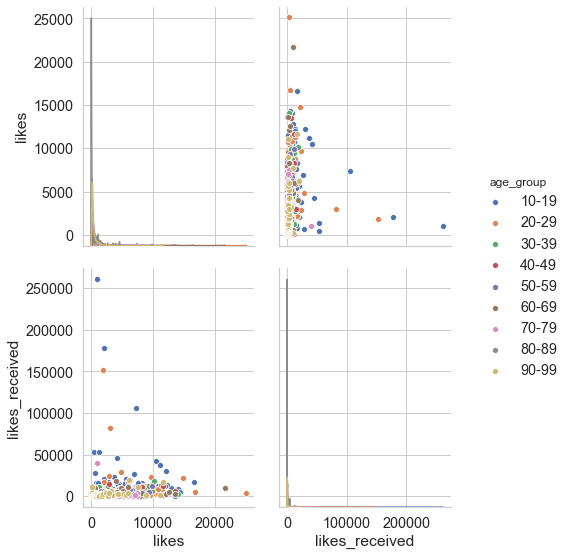

In [34]:
likes = upd_fb_df[['likes','likes_received','age_group']]
sns.pairplot(likes, hue="age_group")
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

<a id=section50406></a>
### Friends Count & Friendships Initiated based on Age Group

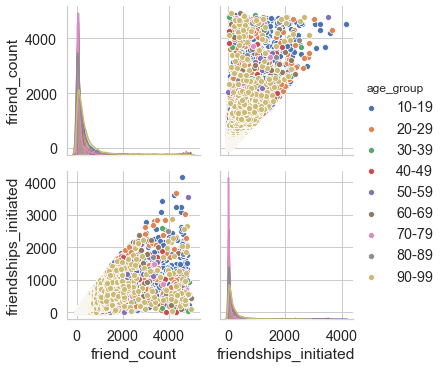

In [176]:
likes = upd_fb_df[['friend_count','friendships_initiated','age_group']]
sns.pairplot(likes, hue="age_group")
plt.show()

<a id=section50407></a>
### Friends Count & Friendships Initiated based on Gender

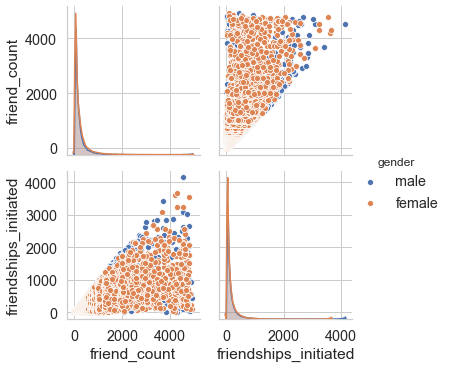

In [179]:
likes = upd_fb_df[['friend_count','friendships_initiated','gender']]
sns.pairplot(likes, hue="gender")
plt.show()

<a id=section50408></a>
### Likes Given/Received across platforms based on Gender

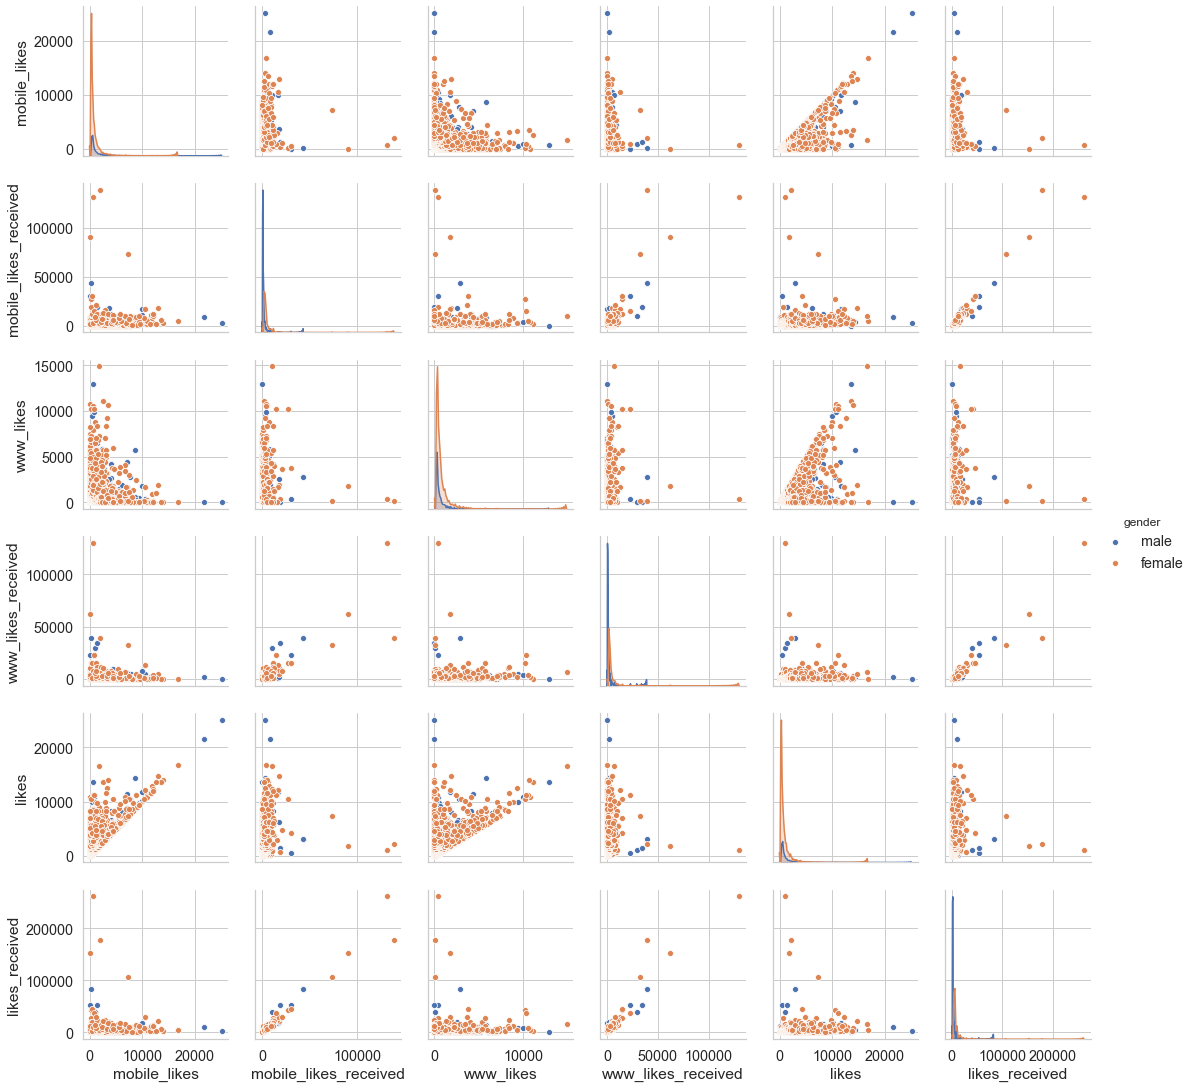

In [181]:
likes = upd_fb_df[['mobile_likes','mobile_likes_received','www_likes','www_likes_received','likes','likes_received','gender']]
sns.pairplot(likes, hue="gender")
plt.show()

<a id=section50409></a>
### Likes Given/Received across platforms based on Age Group

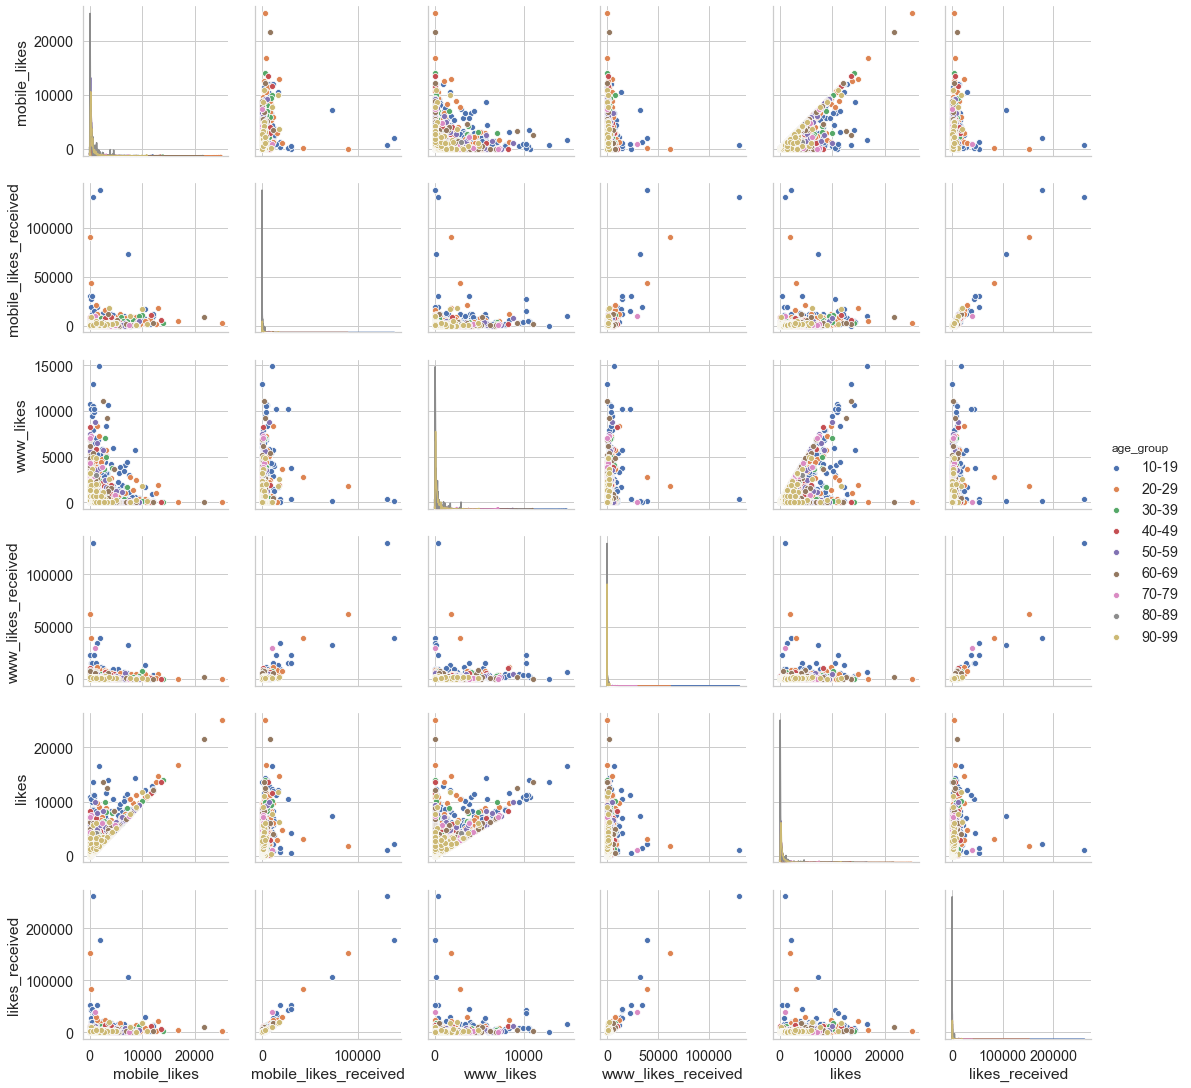

In [182]:
likes = upd_fb_df[['mobile_likes','mobile_likes_received','www_likes','www_likes_received','likes','likes_received','age_group']]
sns.pairplot(likes, hue="age_group")
plt.show()

<a id=section505></a>
### Correlation between numerical variables

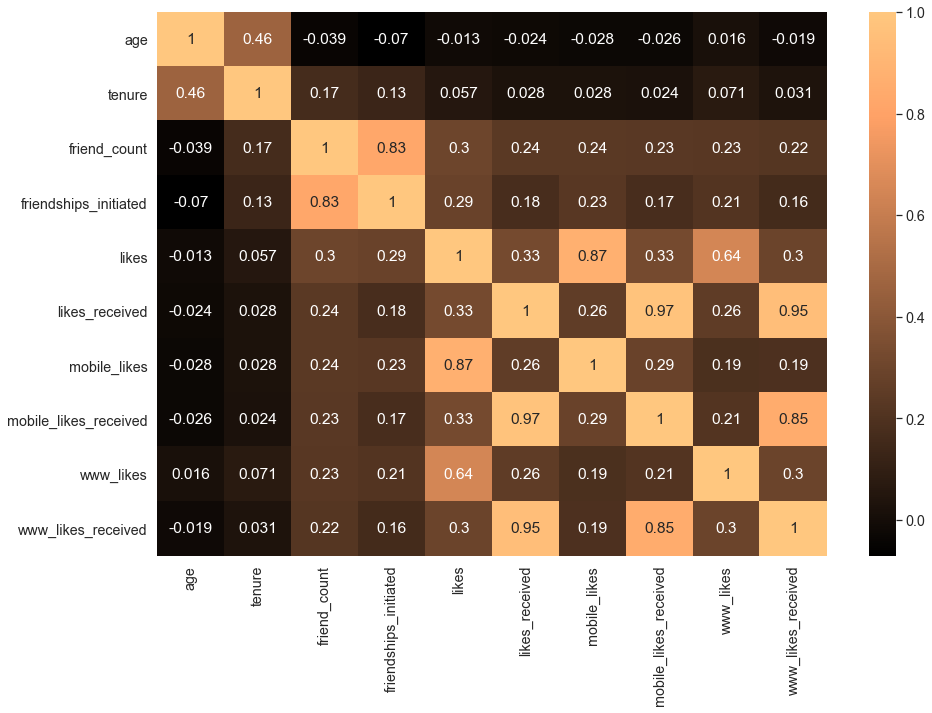

In [184]:
plt.figure(figsize=(15,10))
sns.heatmap(upd_fb_df.corr(), annot=True,cmap='copper')
plt.show()

<a id=section6></a>
## Conclusion

##### Majority of users are in the Age group 20-29 & are Male.
##### Tenure of Female is more than Male.
##### Friendships Initiated is more than Friends Count.
##### Friends Count is more in the age group 10-19 & are Male.
##### Friendships Initiated is more in the age group 10-19 & are Male.
##### Overall Likes Given are more compared to Likes Received.
##### Overall Likes Given/Received are more from Mobile than Web.
##### Overall Likes Given is more for age group 20-29 & Received is more for age group 10-19
##### Overall Likes Given are more by Male and Received are more by Female.